# Importing all libraries that will be used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xgboost as xgb
from xgboost import cv
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Reading the data set

In [ ]:
df = pd.read_csv('house_sales.csv')
df1 = df.copy()

In [ ]:
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Exploratory Data Analysis

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
highest_price = df['price'].max()
print(f'The highest price a house sold for is {highest_price}')
lowest_price = df['price'].min()
print(f'The lowest price a house sold for is {lowest_price}')

The highest price a house sold for is 7700000
The lowest price a house sold for is 75000


In [ ]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df['waterfront'] = df['waterfront'].astype(float)
df['price'] = df['price'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  float64
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<AxesSubplot: >

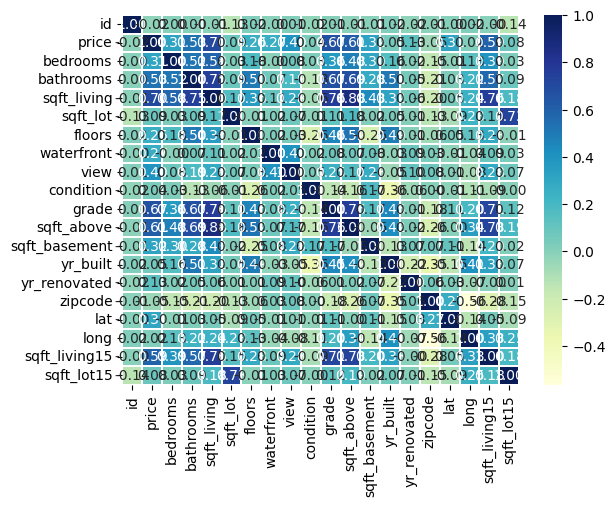

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.01)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6e5273f8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6e526c0430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6e5273fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e526c0f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e526c0be0>],
 'means': []}

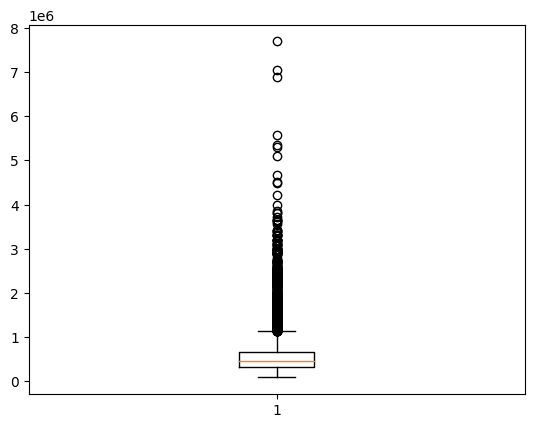

In [ ]:
plt.boxplot(data=df, x='price')

<AxesSubplot: xlabel='price', ylabel='Count'>

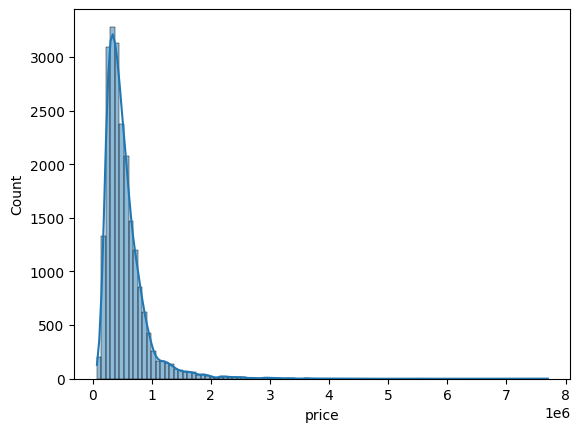

In [ ]:
sns.histplot(data=df, x='price', kde=True, bins=100)

<AxesSubplot: xlabel='price', ylabel='sqft_lot'>

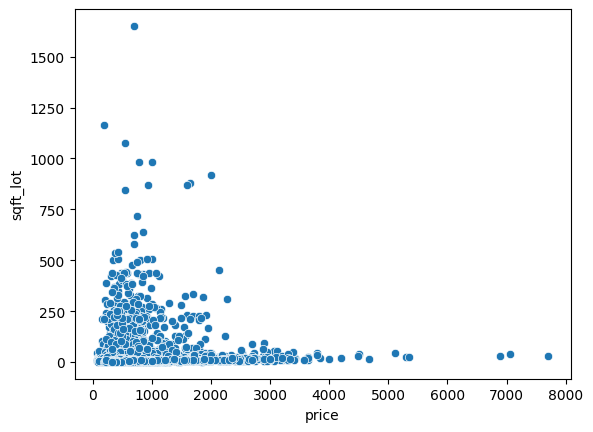

In [ ]:
small_num = df['price'] / 1000
small_lot = df['sqft_lot'] / 1000
sns.scatterplot(data=df, x=small_num, y=small_lot)

## Removing Outliers

In [ ]:
q1 = np.percentile(df['price'], 25)
q3 = np.percentile(df['price'], 75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = (df['price'] < lower_bound) | (df['price'] > upper_bound)
df = df[~outliers]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3.0,2.50,1530.0,1131.0,3.0,0.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4.0,2.50,2310.0,5813.0,2.0,0.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2.0,0.75,1020.0,1350.0,2.0,0.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3.0,2.50,1600.0,2388.0,2.0,0.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,19388.000000,19457.000000,19408.000000,1.947400e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.331030,2.050162,1976.409883,1.469219e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.913143,0.710173,774.359523,4.012756e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.500000,2440.000000,1.033600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


<AxesSubplot: xlabel='price'>

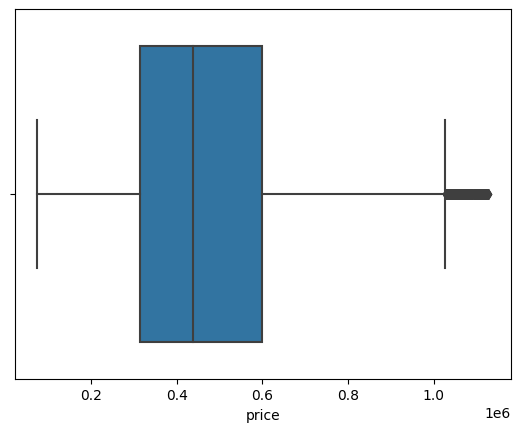

In [ ]:
sns.boxplot(data=df, x='price')

In [ ]:
outliers_99th = np.quantile(df['price'], .95)
df = df[df['price'] < outliers_99th]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(19433, 21)

<AxesSubplot: xlabel='price'>

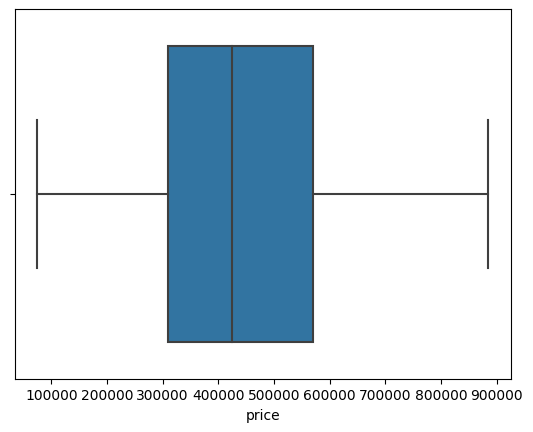

In [ ]:
sns.boxplot(data=df, x='price')

array([[<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>,
        <AxesSubplot: title={'center': 'sqft_lot'}>],
       [<AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>],
       [<AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'view'}>,
        <AxesSubplot: title={'center': 'yr_renovated'}>],
       [<AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

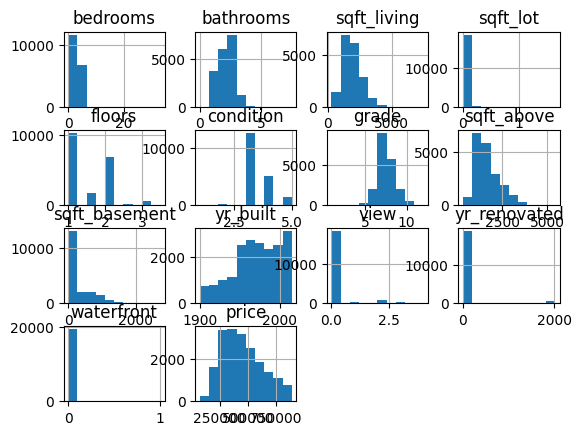

In [ ]:
focus_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'condition', 'grade', 'sqft_above', 
            'sqft_basement', 'yr_built', 'view', 'yr_renovated', 'waterfront', 'price']
df[focus_vars].hist()

In [ ]:
log_var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'condition', 'grade', 'sqft_above', 
            'sqft_basement', 'yr_built', 'view', 'yr_renovated', 'waterfront', 'price']

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)

/tmp/ipykernel_79/2537282231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[transformed] = np.log10(df[var]+1)


array([[<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>,
        <AxesSubplot: title={'center': 'sqft_lot'}>],
       [<AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>],
       [<AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'view'}>,
        <AxesSubplot: title={'center': 'yr_renovated'}>],
       [<AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

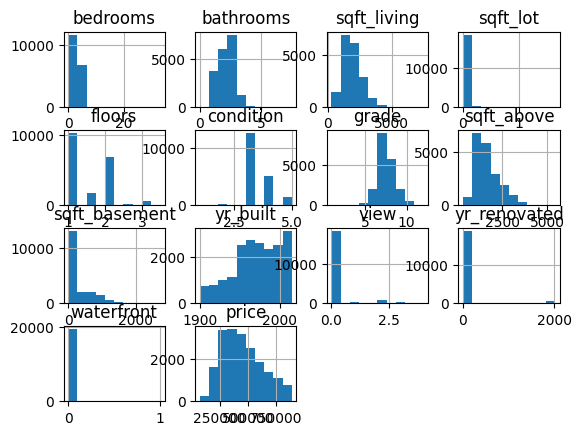

In [ ]:
df[log_var].hist()

# Model selection

We each selected different models based on individual interpretations of the data after cleaning it and applying appropriate methods to consider missing values. The initial model chosen is the XGB boost linear regression model. The reason I chose XGB is because of the capabilities it offers when it comes to ensemble. This is the application of XGB splitting the dataset into smaller sets and using that dataset to run different linear models, it then selects the best model based on its results. The second I chose this model is because it offers the capability to handle null values on its own without having to drop columns or rows with missing values. 

## 

In [ ]:
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'condition', 'grade', 'sqft_above', 
            'sqft_basement', 'yr_built', 'view', 'yr_renovated', 'waterfront']

y = df[target]
X = df[features]

data_matrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.8,'eta': .03, 'max_depth': 5, 'alpha': 10,
            'n_estimators': 1500, 'subsample': 1, 'min_child_weight': 5}
model = xgb.XGBRegressor(**params)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.03, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.round(4)
r2 = r2_score(y_test, predictions)
r2.__round__(4)

0.5558

In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

13862900769.634396

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

117740.82032003342

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mae

92439.68231936106

In [ ]:
test_accuracy = model.score(X_test, y_test).round(decimals=4)
print(f'The Test model accuracy was {test_accuracy}')
train_accuracy = model.score(X_train, y_train).round(decimals=4)
print(f'The training model accuracy is {train_accuracy}')

The Test model accuracy was 0.5558
The training model accuracy is 0.7383


The accuracy results above are a classic result of over fitting. The model can learn patterns with the training data but is unable to create a generalization with the test data. There will be two methods that will be used to try and reduce over fitting; the first is we will stratify the sampling test and train datasets. 

## Cross-validation using XGB K folds

Cross-validation allows us to make sure our model is iterating through our training and test dataset. This is important when we get a rather low R2 value. 

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.8,'eta': .03, 'max_depth': 5, 'alpha': 10,
            'n_estimators': 1500, 'subsample': 1, 'min_child_weight': 5}

xgb_cv = cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, as_pandas=True, seed=123)

/root/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:52:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_cv.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,175228.295055,433.339372,175288.843282,876.710394
1,173157.562232,435.137906,173281.999590,882.784219
2,170625.414327,433.581070,170814.856645,847.279966
3,168235.076285,430.608811,168479.401241,824.636992
4,165951.639754,425.446986,166248.261846,808.631131
5,163716.520825,409.822745,164078.656767,790.710702
6,161595.071104,404.728533,162012.258218,760.965631
7,159626.058217,400.498383,160095.182372,745.866103
8,158035.241405,393.595204,158566.780182,757.547359
9,156167.194864,385.851003,156759.775282,748.598874


In [ ]:
cross_score = cross_val_score(model, X, y, cv=5)
cross_score

array([0.577474  , 0.55451874, 0.57302776, 0.56301305, 0.53484891])

The following plot shows the feature importance of XGboost. This plot allows further use of the model selecting only the features which affect the model. We can see below that water has a small f1 score, therefore we will try to run the model again without the waterfront feature.

## Feature Important

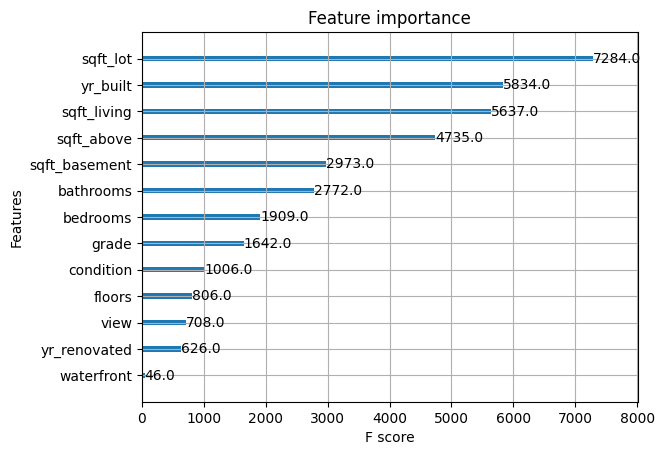

In [ ]:
from xgboost import plot_importance
importance = model.feature_importances_
plot_importance(model)
plt.show()

## First sets of modifications to our XGB linear model

In [ ]:
df = df1.dropna()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Find-tuned XGBoost model

In [ ]:
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above', 
            'sqft_basement', 'yr_built']

y = df[target]
X = df[features]

data_matrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=1)

### New parameters selected to reduce over-fitting

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.8,'eta': .01, 'max_depth': 3, 'alpha': 10,
            'n_estimators': 1500, 'subsample': .8, 'min_child_weight': 10, 'gamma': 10000, 'eta': .01}
model = xgb.XGBRegressor(**params)

In [ ]:
model.fit(X_train, y_train)
new_predictions = model.predict(X_test)

In [ ]:
predictions.round(4)
r2 = r2_score(y_test, new_predictions)
print(f'The new r2 value is: {r2.__round__(4)}')
mse = mean_squared_error(y_test, new_predictions)
print(f'the new mean squared error is: {mse}')
rmse = np.sqrt(mean_squared_error(y_test, new_predictions))
print(f'The new root mean squared error is: {rmse}')
mae = mean_absolute_error(y_test, new_predictions)
print(f'The new mean absolute error is: {mae}')

The new r2 value is: 0.7024
the new mean squared error is: 42699141115.67838
The new root mean squared error is: 206637.70497099115
The new mean absolute error is: 129768.93519438138


In [ ]:
test_accuracy = model.score(X_test, y_test).round(decimals=4)
print(f'The Test model accuracy was {test_accuracy}')
train_accuracy = model.score(X_train, y_train).round(decimals=4)
print(f'The training model accuracy is {train_accuracy}')

The Test model accuracy was 0.7024
The training model accuracy is 0.7492


While the testing accuracy is improving we are still facing over fitting issues. Our training accuracy is approximately 87% but our testing data accuracy is at 69% which is a significant difference.

In [ ]:
xgb_cv = cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, as_pandas=True, seed=123)

/root/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:53:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_cv.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,366775.028324,2070.575753,366801.309595,4126.156282
1,364777.160220,2093.520313,364837.984528,4092.040527
2,363088.089809,2015.969006,363201.330881,4191.456000
3,361247.072404,2022.001592,361453.948009,4197.424756
4,359622.632024,1933.359556,359871.499973,4296.861793
5,357748.491173,1952.626454,358064.215049,4324.339492
6,355846.137518,1975.464786,356219.187678,4254.075196
7,353971.178614,1986.357204,354402.567439,4244.093414
8,352257.944429,1977.388421,352765.442414,4237.915808
9,350470.773235,1969.423287,351035.762923,4266.742440


In [ ]:
cross_score = cross_val_score(model, X, y, cv=5)
cross_score

array([0.67596622, 0.70512639, 0.6821085 , 0.68247067, 0.66417211])

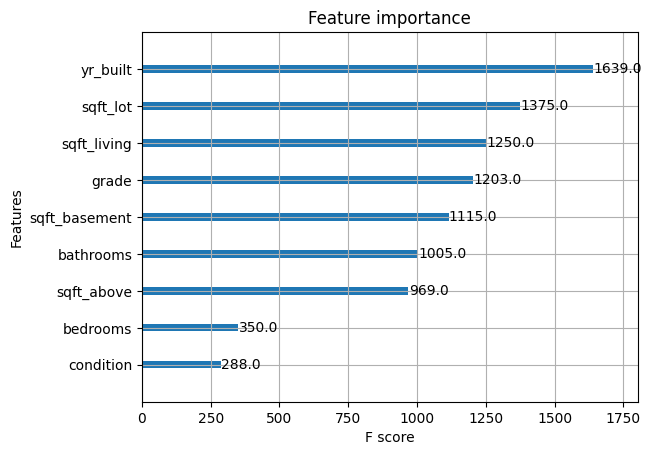

In [ ]:
new_features = model.feature_importances_
plot_importance(model)
plt.show()

We will now explore other models which require us to handle missing values beforehand. 

In [ ]:
model2 = LinearRegression()

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_preds = model2.predict(X_test)

In [ ]:
r_square = r2_score(y_test, y_preds)
r_square

0.6219872832865498

In [ ]:
mae2 = mean_squared_error(y_test, y_preds)
np.sqrt(mae2)

232886.30085083953

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
new_predictions = rf.predict(X_test)
r2_score(new_predictions, y_test)

0.5771488021302547

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=2)
ridge_model.fit(X_train, y_train)

Ridge(alpha=2)

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
r2_score(y_pred_ridge, y_test)

0.34851105788607584

In [ ]:
mae2 = mean_squared_error(y_test, y_pred_ridge)
np.sqrt(mae2)

232886.28868455434

https://www.visual-design.net/post/data-transformation-and-feature-engineering-in-python.

https://towardsdatascience.com/a-journey-through-xgboost-milestone-3-a5569c72d72b

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a25169f-cee2-4215-9b35-ec7b1b24fa62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>